# Sample Submission Notebook 
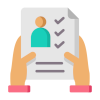
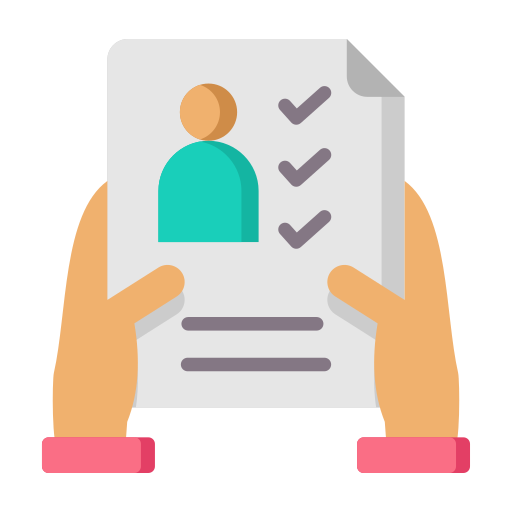
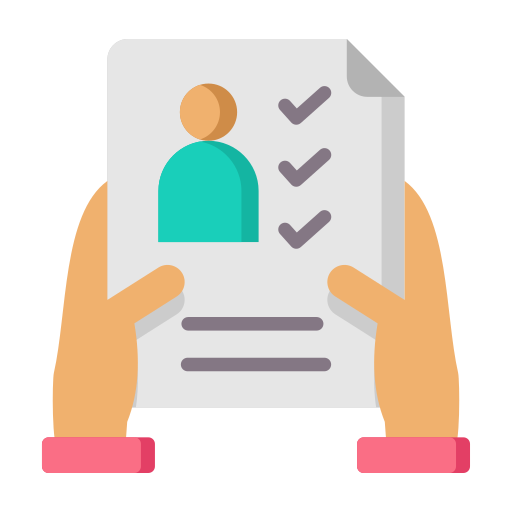

## Trigger Matrix Construction

This notebook builds a **zero‐filled trigger matrix** for the 45 poisoned models across three channels:

1. **Configuration Parameters**  
   - `N_SAMPLES = 75` — length of each trigger segment  
   - `N_MODELS  = 45` — how many (poisoned) models we’ll test  
   - `CHANNELS  = ['channel_44', 'channel_45', 'channel_46']` 🛰️ — the three monitored channels  

2. **Zero Trigger Vector**  
   - We create a flat vector of zeros with length `75 samples × 3 channels = 225`  
   - This represents “no trigger” by default (all values = 0)  

3. **Trigger DataFrame**  
   - **Rows:** one per model (`N_MODELS = 45`)  
   - **Columns:**  
     - `model_id` (1–45) 🚩 inserted as the first column  
     - `channel_44_1, channel_44_2, …, channel_44_75, channel_45_1, …, channel_46_75` 🔠 generated via a nested list comprehension  
   - Index shifted to start at **1** for human-friendly referencing  

4. **Preview**  
   - `df.head()` displays the first 5 rows so you can confirm:  
     | model_id | channel_44_1 | … | channel_46_75 |  
     |:--------:|:------------:|:-:|:-------------:|  
     |    1     |      0.0     | … |      0.0      |  
     |    2     |      0.0     | … |      0.0      |  
     |   …      |      …       | … |      …        |  

---

🎯 **Why this matters:**  
Having a clean, zero‐trigger baseline lets us **inject** custom spike patterns later and measure each model’s sensitivity—one row per model, one column per time‐step per channel. This structured setup is key for systematic **trigger discovery** and vulnerability analysis. 🕵️‍♀️ 


## Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Zero Trigger Creation

In [2]:
# ─── Configuration ─────────────────────────────────────────────────────────────
N_SAMPLES = 75                            # duration of each trigger
N_MODELS  = 45                            # number of (poisoned) models
CHANNELS  = ['channel_44',                # three 75-sample channels
             'channel_45',
             'channel_46']

# ─── Build the zero trigger vector ─────────────────────────────────────────────
# length = N_SAMPLES * len(CHANNELS)
zero_trigger = np.zeros(N_SAMPLES * len(CHANNELS))

# ─── Create DataFrame with one row per model ──────────────────────────────────
data = np.tile(zero_trigger, (N_MODELS, 1))
df = pd.DataFrame(data)

# ─── Generate & assign channel-only column names ───────────────────────────────
channel_cols = [
    f"{ch}_{i+1}"
    for ch in CHANNELS
    for i in range(N_SAMPLES)
]
df.columns = channel_cols  # now df.shape[1] == len(channel_cols)

# ─── Insert model IDs and shift index to start at 1 ────────────────────────────
# Note for the reader: model_id (and the DataFrame index) now starts at 1, not 0!
print("⚠️  Note: model_id and index start at 1 (not 0). \n")
df.insert(0, "model_id", range(1, N_MODELS + 1))
df.index = df.index + 1

# ─── Preview ──────────────────────────────────────────────────────────────────
df.head()


⚠️  Note: model_id and index start at 1 (not 0). 



,model_id,channel_44_1,channel_44_2,channel_44_3,channel_44_4,channel_44_5,channel_44_6,channel_44_7,channel_44_8,channel_44_9,...,channel_46_66,channel_46_67,channel_46_68,channel_46_69,channel_46_70,channel_46_71,channel_46_72,channel_46_73,channel_46_74,channel_46_75
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Submission Export

In [3]:
# ─── Export to CSV and Submit ───────────────────────────────────────────────────
df.to_csv("submission.csv", index=False)